In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from pathlib import Path
from sklearn.model_selection import train_test_split

import os

In [7]:
risk_df = pd.read_csv(os.path.join("Resources", "lending_data.csv"))
risk_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [15]:
X = risk_df[['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt']]
y = risk_df['loan_status']

print("Shape", X.shape, y.shape)

Shape (77536, 7) (77536,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [13]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [20]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_train, y_test)}")

Training Data Score: 0.9918489475856377


In [109]:
# Train a Logistic Regression model print the model score

0.9908171687990095

In [110]:
# Train a Random Forest Classifier model and print the model score

0.9910751134956666

***********K-nearest neighbor analysis**************

In [24]:
from sklearn.preprocessing import StandardScaler
X_scaler=StandardScaler().fit(X_train)

In [26]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.997/0.991
k: 3, Train/Test Score: 0.995/0.993
k: 5, Train/Test Score: 0.995/0.993
k: 7, Train/Test Score: 0.995/0.994
k: 9, Train/Test Score: 0.995/0.994
k: 11, Train/Test Score: 0.994/0.994
k: 13, Train/Test Score: 0.994/0.994
k: 15, Train/Test Score: 0.994/0.994
k: 17, Train/Test Score: 0.994/0.994
k: 19, Train/Test Score: 0.994/0.994


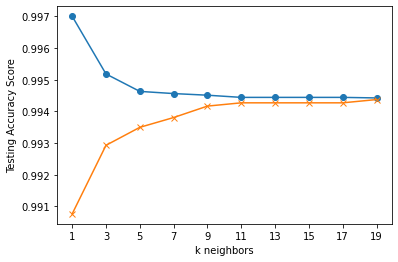

In [28]:
train_scores = []
test_scores = []
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1,20,2), train_scores, marker='o')
plt.plot(range(1,20,2), test_scores, marker = 'x')

loc, labels = plt.xticks()

plt.xticks(np.arange(1, max(loc), step=2))

plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [31]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc:%.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc:0.994


In [32]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)

In [36]:
confusion_matrix(y_true, y_pred)

array([[18666,   107],
       [    6,   605]])

In [37]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18773
           1       0.85      0.99      0.91       611

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.96     19384
weighted avg       0.99      0.99      0.99     19384

